In [1]:
import uproot
import pandas as pd
import numpy as np

In [2]:
tfile = uproot.open('electron_features.root')
mc = pd.DataFrame(
      tfile['features/tree'].arrays(
         tfile['features/tree'].keys()
         )
      )

In [3]:
mc[mc.is_e][['gen_pt','trk_pt','gsf_pt','ele_pt','preid_trk_ecal_Deta']].head()

,gen_pt,trk_pt,gsf_pt,ele_pt,preid_trk_ecal_Deta
0,3.608217,3.363398,3.456851,3.416700,0.057574
1,3.100642,3.081321,3.155636,3.641827,0.003723
2,3.924682,-1.000000,-1.000000,-1.000000,-1.000000
3,12.313822,12.179570,11.894906,14.609233,-0.000939
4,1.070635,1.024662,1.094570,-1.000000,0.006878


In [4]:
missing = mc.is_e & (mc.gsf_pt > 0) & (mc.ele_pt <= 0)
miss = mc[missing]
trk_dr = np.sqrt((miss.gen_eta - miss.trk_eta)**2 + (miss.gen_phi- miss.trk_phi)**2)
gsf_dr = np.sqrt((miss.gen_eta - miss.gsf_eta)**2 + (miss.gen_phi- miss.gsf_phi)**2)

In [5]:
miss[miss.gen_pt > 4][['lumi','evt','gen_pt','trk_pt','gsf_pt','ele_pt','preid_trk_ecal_Deta']].head()

,lumi,evt,gen_pt,trk_pt,gsf_pt,ele_pt,preid_trk_ecal_Deta
13,106572,31971353,5.426744,5.531412,1.736093,-1.0,-0.003527
83,197294,59188092,5.626984,3.422086,3.397850,-1.0,0.011344
99,198241,59472208,4.315388,4.142424,4.623238,-1.0,-0.011715
155,199308,59792332,8.633627,7.779459,9.001151,-1.0,-0.003374
188,201513,60453732,4.425927,4.392927,5.440060,-1.0,1000.000000


In [6]:
[i for i in miss.columns if 'has' in i]

['has_ele_core',
 'has_pfBlock',
 'has_pfBlock_with_ECAL',
 'has_pfBlock_with_SC',
 'has_pfEgamma',
 'has_pfGSF_trk',
 'pfgsf_gsf_has_ktf']

In [7]:
mask = (miss.preid_trk_ecal_Deta < 999) & np.invert(miss.has_ele_core)
#has_pfGSF_trk has_pfEgamma
mask1 = (mask & miss.has_pfGSF_trk &np.invert(miss.has_pfEgamma))
to_check1 = miss[mask1][['run','lumi','evt','gsf_pt','gsf_eta','gsf_phi']]

print ','.join([':'.join([str(j) for j in i]) for i in to_check1[['run','lumi','evt']].as_matrix()])
print '\n\n'
vv = {}
for i in range(to_check1.shape[0]):
    entry = to_check1.iloc[i]
    vv[int(entry.evt)] = (entry.gsf_pt, entry.gsf_eta, entry.gsf_phi)
print vv
to_check1.head()
print to_check1.shape[0]

1:188451:56535285,1:197582:59274487,1:198749:59624562,1:201111:60333114,1:203454:61035956,1:204665:61399352,1:205841:61752053,1:191989:57596421



{57596421: (4.8779349327087402, 1.6361966133117676, -0.44368463754653931), 59624562: (1.3961746692657471, -1.7653611898422241, 0.35166314244270325), 61035956: (1.3295170068740845, -0.74432915449142456, -0.89448297023773193), 56535285: (2.057009220123291, -0.78594261407852173, -2.8598525524139404), 59274487: (1.2078419923782349, -0.71046125888824463, 1.0331467390060425), 61399352: (1.9714157581329346, -1.4073941707611084, 1.7577246427536011), 60333114: (1.0912861824035645, -0.87859433889389038, -2.2439939975738525), 61752053: (1.9641132354736328, -1.4127223491668701, 2.0960731506347656)}
8


In [8]:
#has_pfGSF_trk has_pfEgamma
mask2 = (mask & np.invert(miss.has_pfGSF_trk) & (miss.gsf_pt > 0))
to_check2 = miss[mask2][['run','lumi','evt','gsf_pt','gsf_eta','gsf_phi']]

print ','.join([':'.join([str(j) for j in i]) for i in to_check2[['run','lumi','evt']].as_matrix()])
print '\n\n'
vv = {}
for i in range(to_check2.shape[0]):
    entry = to_check2.iloc[i]
    vv[int(entry.evt)] = (entry.gsf_pt, entry.gsf_eta, entry.gsf_phi)
print vv
print to_check2.shape[0]
to_check2.head()

1:106498:31949309,1:196220:58865712,1:198241:59472208,1:201071:60321251,1:203639:61091548,1:204605:61381254,1:205812:61743594,1:205952:61785330,1:190534:57160055,1:192724:57817001,1:194675:58402401



{59472208: (4.6232380867004395, -0.65895694494247437, -0.25869864225387573), 60321251: (1.1779265403747559, 0.82428324222564697, 1.5455923080444336), 61381254: (4.7505941390991211, 0.25948464870452881, -2.0914435386657715), 58402401: (1.7245339155197144, 0.44584566354751587, -1.5300849676132202), 57817001: (9.2789793014526367, 2.2519600391387939, 0.67897021770477295), 61743594: (9.8303279876708984, 0.39349210262298584, 2.9180049896240234), 58865712: (2.4383711814880371, -1.5381476879119873, 3.0827889442443848), 61785330: (1.6721429824829102, -0.74857711791992188, -1.1605315208435059), 57160055: (2.4560666084289551, 0.96155643463134766, -2.9944767951965332), 61091548: (17.432041168212891, -0.23632617294788361, 2.0985651016235352), 31949309: (3.1733708381652832, 1.6469196081161499, -1.10840

,run,lumi,evt,gsf_pt,gsf_eta,gsf_phi
9,1,106498,31949309,3.173371,1.646920,-1.108405
43,1,196220,58865712,2.438371,-1.538148,3.082789
99,1,198241,59472208,4.623238,-0.658957,-0.258699
176,1,201071,60321251,1.177927,0.824283,1.545592
247,1,203639,61091548,17.432041,-0.236326,2.098565


In [9]:
miss.columns

Index([u'ele_eta', u'ele_phi', u'ele_pt', u'evt', u'gen_eta', u'gen_phi',
       u'gen_pt', u'gsf_chi2red', u'gsf_dxy', u'gsf_dxy_err', u'gsf_eta',
       u'gsf_inp', u'gsf_nhits', u'gsf_outp', u'gsf_phi', u'gsf_pt',
       u'has_ele_core', u'has_pfBlock', u'has_pfBlock_with_ECAL',
       u'has_pfBlock_with_SC', u'has_pfEgamma', u'has_pfGSF_trk', u'is_e',
       u'is_e_not_matched', u'is_other', u'lumi', u'pfgsf_gsf_ecalDriven',
       u'pfgsf_gsf_has_ktf', u'pfgsf_gsf_trackerDriven',
       u'pfgsf_ktf_is_fifthStep', u'pfgsf_passes_preselection',
       u'pfgsf_passes_selection', u'pfgsf_valid_gsf_brem',
       u'pfgsf_xclean_AngularGsfCleaning', u'pfgsf_xclean_BothTrk_bad_EoverP',
       u'pfgsf_xclean_BothTrk_noECAL_match',
       u'pfgsf_xclean_ECALDriven_bad_EoverP',
       u'pfgsf_xclean_ECALDriven_too_few_hits', u'pfgsf_xclean_FINAL',
       u'pfgsf_xclean_TrkDriven_too_few_hits',
       u'pfgsf_xclean_TrkDriven_vs_ECALDriven',
       u'pfgsf_xclean_noECAL_match_AGAIN', u'pfgsf_

In [10]:
wgsf_nopfgsf = miss[(miss.gsf_pt > 0) & np.invert(miss.has_pfGSF_trk)].copy()
xclean = [i for i in miss.columns if 'pfgsf_xclean_' in i]
wgsf_nopfgsf.pfgsf_xclean_seedref = np.invert(wgsf_nopfgsf.pfgsf_xclean_seedref)

In [11]:
(wgsf_nopfgsf[xclean].as_matrix().sum(axis=1) == 1).all()

True

In [12]:
lines_mapping = {
 'pfgsf_xclean_AngularGsfCleaning' : 'L750',
 'pfgsf_xclean_BothTrk_bad_EoverP' : 'L715',
 'pfgsf_xclean_BothTrk_noECAL_match' : 'L731',
 'pfgsf_xclean_ECALDriven_bad_EoverP' : 'L614',
 'pfgsf_xclean_ECALDriven_too_few_hits' : 'L609',
 'pfgsf_xclean_FINAL' : 'L781',
 'pfgsf_xclean_TrkDriven_too_few_hits' : 'L662',
 'pfgsf_xclean_TrkDriven_vs_ECALDriven' : 'L679',
 'pfgsf_xclean_noECAL_match_AGAIN' : 'L772',
 'pfgsf_xclean_seedref' : 'L518',
}

def format_name(nn):
    return nn.split('_xclean_')[1].replace('_', ' ')+' '+lines_mapping[nn]

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

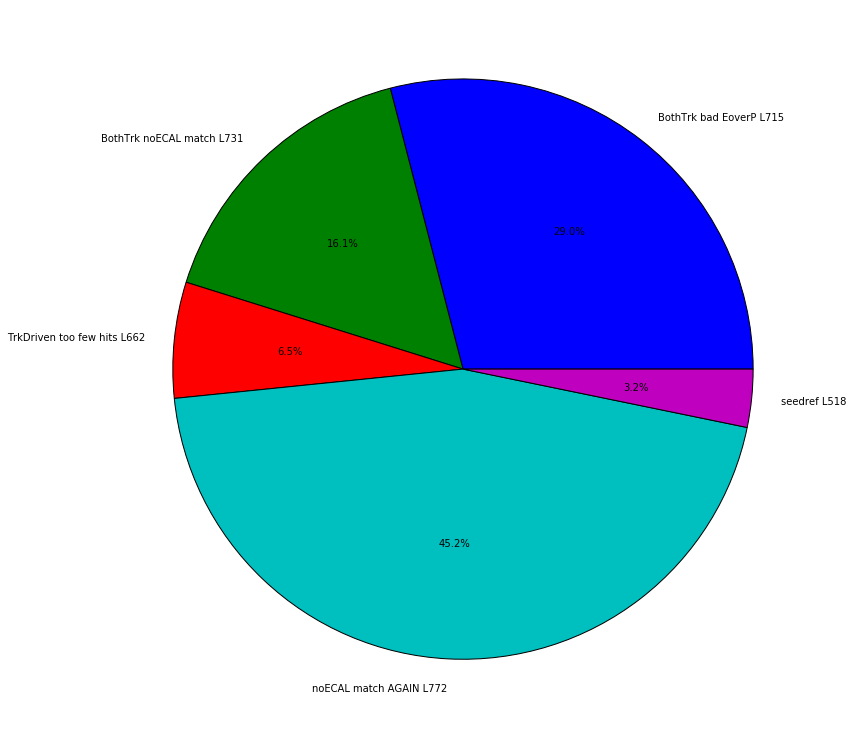

In [14]:
name_and_sizes = [(format_name(i), wgsf_nopfgsf[i].sum()) for i in xclean if wgsf_nopfgsf[i].sum()]
fig = plt.figure(figsize=(13, 13))
plt.pie([i for _, i in name_and_sizes], labels=[i for i, _ in name_and_sizes], autopct='%1.1f%%')
plt.show()

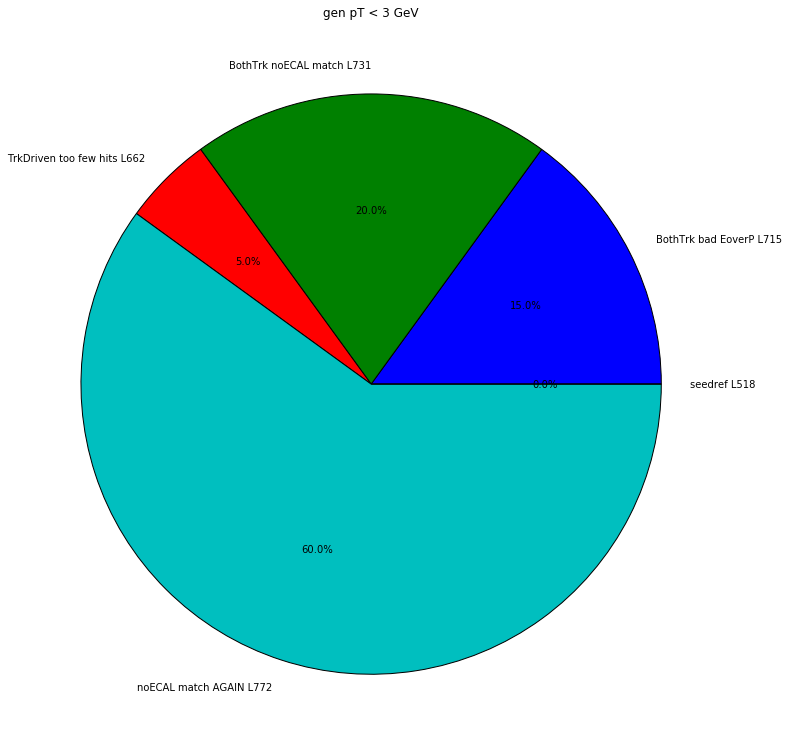

In [15]:
name_and_sizes = [(format_name(i), wgsf_nopfgsf[wgsf_nopfgsf.gen_pt < 3][i].sum()) for i in xclean if wgsf_nopfgsf[i].sum()]
fig = plt.figure(figsize=(13, 13))
plt.title('gen pT < 3 GeV')
plt.pie([i for _, i in name_and_sizes], labels=[i for i, _ in name_and_sizes], autopct='%1.1f%%')
plt.show()

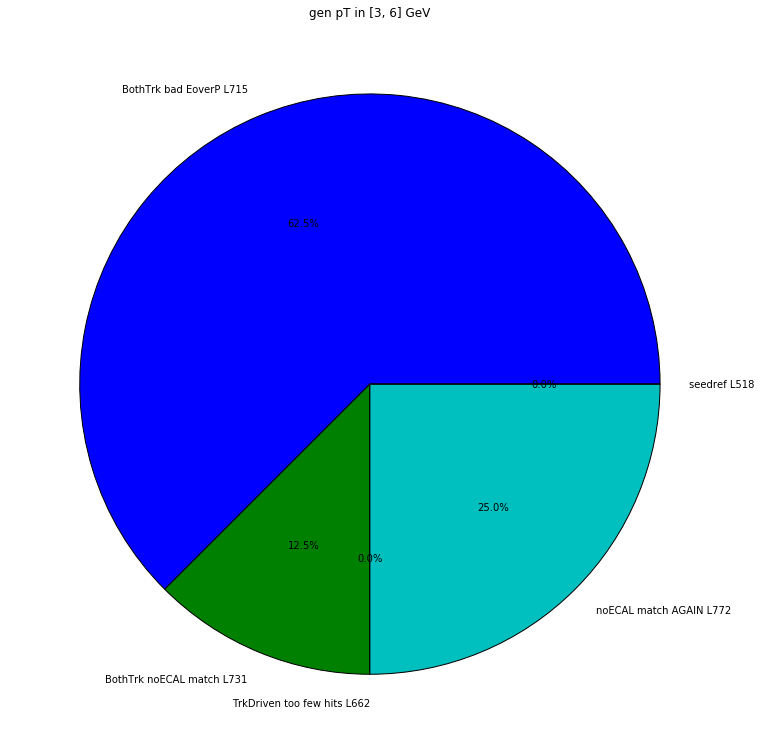

In [16]:
name_and_sizes = [(format_name(i), wgsf_nopfgsf[(wgsf_nopfgsf.gen_pt >= 3) & (wgsf_nopfgsf.gen_pt < 6)][i].sum()) for i in xclean if wgsf_nopfgsf[i].sum()]
fig = plt.figure(figsize=(13, 13))
plt.title('gen pT in [3, 6] GeV')
plt.pie([i for _, i in name_and_sizes], labels=[i for i, _ in name_and_sizes], autopct='%1.1f%%')
plt.show()

In [17]:
useful_info = [
    'gen_pt', 'gsf_pt', 'gsf_eta', 'gsf_phi',
    'has_pfGSF_trk'
] + [i for i in miss.columns if i.startswith('pfgsf_xclean_')]
print miss[(miss.evt == 31949309)].iloc[1][useful_info]
print '\n\n\n'
print miss[(miss.evt == 31949309)].iloc[0][useful_info]

gen_pt                                  3.21331
gsf_pt                                  3.17337
gsf_eta                                 1.64692
gsf_phi                                -1.10841
has_pfGSF_trk                             False
pfgsf_xclean_AngularGsfCleaning           False
pfgsf_xclean_BothTrk_bad_EoverP            True
pfgsf_xclean_BothTrk_noECAL_match         False
pfgsf_xclean_ECALDriven_bad_EoverP        False
pfgsf_xclean_ECALDriven_too_few_hits      False
pfgsf_xclean_FINAL                        False
pfgsf_xclean_TrkDriven_too_few_hits       False
pfgsf_xclean_TrkDriven_vs_ECALDriven      False
pfgsf_xclean_noECAL_match_AGAIN           False
pfgsf_xclean_seedref                       True
Name: 9, dtype: object




gen_pt                                  2.56042
gsf_pt                                    2.717
gsf_eta                                 1.70873
gsf_phi                                -1.27441
has_pfGSF_trk                             False
pfgsf_xclean_

In [18]:
debug_entries = [i for i in open('debug.log').read().split('PFElecTkProducer:: considering track')]

In [19]:
interesting_entries = [i for i in debug_entries if any(j in i.split('\n')[0] for j in ['3.173', '2.717'])]
len(interesting_entries)

2

In [20]:
cropped = [i.split('\n')[0]+'\n PFElecTkProducer:: and  comparing with track'+i.split('comparing with track')[-1] for i in interesting_entries]

In [21]:
print cropped[0]
print '\n\n\n'
print cropped[1]

 3.17337 eta,phi 1.64692, -1.10841
 PFElecTkProducer:: and  comparing with track 1.22521 eta,phi 1.65264, -0.730939
 Entering angular superloose preselection 
 Sharing ECAL energy passed  nEtot 3.1423 iEtot 3.1423
 Both Track are trackerDriven 
 nETot 3.1423 iETot 3.1423 ETot 3.1423
 nPin 8.06068 iPin 3.09306 nEP 0.38983 iEP 1.01592
 




 2.717 eta,phi 1.70873, -1.27441
 PFElecTkProducer:: and  comparing with track 5.84655 eta,phi 1.65407, -1.18535
 Entering angular superloose preselection 
 Close Tracks and failed all the conditions  feta 0.0546587 fabs(fphi) 0.106415 minBremDphi 0.106736 nETot 0 iETot 3.1423 nLostHits 0 iLostHits 0



In [22]:
matched = uproot.open('perfectSeeding.root')
perfect_seeding = pd.DataFrame(
      matched['features/tree'].arrays(
         matched['features/tree'].keys()
         )
      )

In [23]:
print perfect_seeding[(perfect_seeding.evt == 31949309)].iloc[1][useful_info]
print '\n\n\n'
print perfect_seeding[(perfect_seeding.evt == 31949309)].iloc[0][useful_info]

gen_pt                                  3.21331
gsf_pt                                  3.17337
gsf_eta                                 1.64692
gsf_phi                                -1.10841
has_pfGSF_trk                              True
pfgsf_xclean_AngularGsfCleaning           False
pfgsf_xclean_BothTrk_bad_EoverP           False
pfgsf_xclean_BothTrk_noECAL_match         False
pfgsf_xclean_ECALDriven_bad_EoverP        False
pfgsf_xclean_ECALDriven_too_few_hits      False
pfgsf_xclean_FINAL                         True
pfgsf_xclean_TrkDriven_too_few_hits       False
pfgsf_xclean_TrkDriven_vs_ECALDriven      False
pfgsf_xclean_noECAL_match_AGAIN           False
pfgsf_xclean_seedref                       True
Name: 9, dtype: object




gen_pt                                  2.56042
gsf_pt                                    2.717
gsf_eta                                 1.70873
gsf_phi                                -1.27441
has_pfGSF_trk                             False
pfgsf_xclean_

In [39]:
wgsf_nopfgsf_idx = wgsf_nopfgsf.set_index(['lumi','evt','gsf_pt'])
perfect_seeding_idx = perfect_seeding.set_index(['lumi','evt','gsf_pt'])

In [45]:
#wgsf_nopfgsf_idx.head()
perfect_seeding_idx[['ele_pt']].head()

ele_pt
lumi   evt      gsf_pt               
106094 31828124  3.456851    3.416700
                 3.155636    3.641827
106186 31855719 -1.000000   -1.000000
                 11.894906  14.609233
106402 31920547  1.094570   -1.000000

In [64]:
lmerged = [
    'gen_pt', 'gsf_eta', 'gsf_phi',
    'has_pfGSF_trk'
] + [i for i in miss.columns if i.startswith('pfgsf_xclean_')]
merged = pd.merge(
    wgsf_nopfgsf[useful_info+['lumi','evt']],
    perfect_seeding[['lumi','evt','gsf_pt','ele_pt','has_ele_core', 'has_pfBlock', 'has_pfBlock_with_ECAL']],
    on=['lumi','evt','gsf_pt'],
    how='inner',
)

In [75]:
merged[['evt','gsf_pt','has_ele_core','pfgsf_xclean_noECAL_match_AGAIN','pfgsf_xclean_BothTrk_bad_EoverP']].head()

,evt,gsf_pt,has_ele_core,pfgsf_xclean_noECAL_match_AGAIN,pfgsf_xclean_BothTrk_bad_EoverP
0,31949309,2.717000,False,True,False
1,31949309,3.173371,True,False,True
2,31998469,1.786889,False,True,False
3,58865712,2.438371,True,False,True
4,32265644,3.420204,True,False,True


In [79]:
merged[(merged.has_ele_core & merged.pfgsf_xclean_noECAL_match_AGAIN)].iloc[0]

gen_pt                                   1.64359
gsf_pt                                   1.67214
gsf_eta                                -0.748577
gsf_phi                                 -1.16053
has_pfGSF_trk                              False
pfgsf_xclean_AngularGsfCleaning            False
pfgsf_xclean_BothTrk_bad_EoverP            False
pfgsf_xclean_BothTrk_noECAL_match          False
pfgsf_xclean_ECALDriven_bad_EoverP         False
pfgsf_xclean_ECALDriven_too_few_hits       False
pfgsf_xclean_FINAL                         False
pfgsf_xclean_TrkDriven_too_few_hits        False
pfgsf_xclean_TrkDriven_vs_ECALDriven       False
pfgsf_xclean_noECAL_match_AGAIN             True
pfgsf_xclean_seedref                       False
lumi                                      205952
evt                                     61785330
ele_pt                                   1.63915
has_ele_core                                True
has_pfBlock                                 True
has_pfBlock_with_ECA

In [89]:
print merged[(merged.has_ele_core & merged.pfgsf_xclean_BothTrk_bad_EoverP)][['lumi','evt','gsf_pt', 'ele_pt']]

      lumi       evt    gsf_pt    ele_pt
1   106498  31949309  3.173371  3.115899
3   196220  58865712  2.438371  2.376912
4   107553  32265644  3.420204 -1.000000
5   107748  32324317  3.257180 -1.000000
11  198241  59472208  4.623238  4.815022
21  190534  57160055  2.456067  2.389011
27  195636  58690608  2.268065 -1.000000


In [84]:
print merged[(merged.has_ele_core & merged.pfgsf_xclean_BothTrk_bad_EoverP)].shape, merged.pfgsf_xclean_BothTrk_bad_EoverP.sum(), wgsf_nopfgsf.pfgsf_xclean_BothTrk_bad_EoverP.sum()
print merged.pfgsf_xclean_noECAL_match_AGAIN.sum(), wgsf_nopfgsf.pfgsf_xclean_noECAL_match_AGAIN.sum()

(7, 21) 7 9
13 14


In [73]:
len(kleft.intersection(kright))

28